In [ ]:
import tensorflow as tf
print(tf.__version__)

In [3]:
from tensorflow.keras.models import load_model

# Path to your .keras model file
model_path = r"C:\Users\ksaks\Downloads\DATA\Models\Model_Inception\Inception_net_epoch_50_loss_0.5707.h5" # Replace with your file path

# Load the model
model = load_model(model_path)

# Check the loaded model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 21804833 (83.18 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


Found 125 images belonging to 2 classes.
4/4 [==============================] - 5s 757ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.832
Confusion Matrix:
 [[43 17]
 [ 4 61]]
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.91      0.72      0.80        60
        REAL       0.78      0.94      0.85        65

    accuracy                           0.83       125
   macro avg       0.85      0.83      0.83       125
weighted avg       0.85      0.83      0.83       125



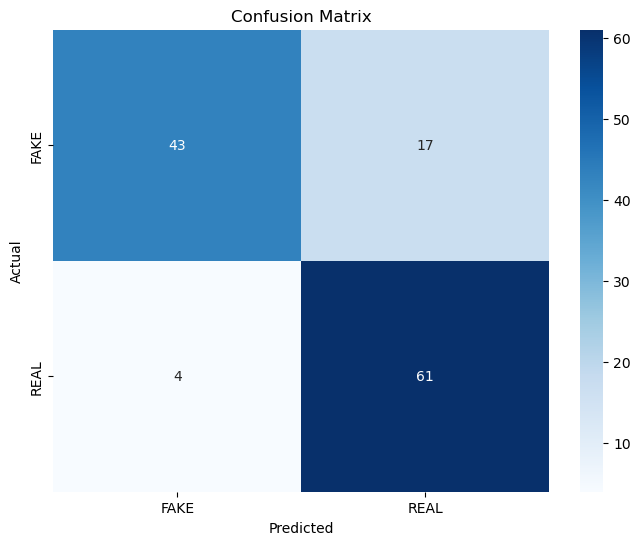

In [12]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Rescale test images

# Load test images from directory
test_generator = test_datagen.flow_from_directory(
    'C:/Users/ksaks/Downloads/DATA/Testing',  # Path to your test data folder
    target_size=(299, 299),  # Image size should match the InceptionV3 input
    batch_size=32,  # Batch size
    class_mode='binary',  # Binary classification
    shuffle=False  # Keep file order for evaluation
)

# Predict on test data
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Get true labels from the generator
true_labels = test_generator.classes
print(true_labels)

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=test_generator.class_indices.keys(),
    yticklabels=test_generator.class_indices.keys()
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


1/1 [==============================] - 2s 2s/step


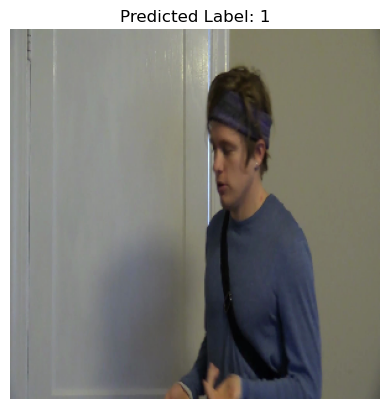

Predicted Class: REAL
Prediction Score: 0.7449


In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt

# Load the trained model
model_path = r"C:\Users\ksaks\Downloads\DATA\Models\Model_Inception\Inception_net_epoch_50_loss_0.5707.h5" # Replace with your file path
model = load_model(model_path)

# Path to the single image
image_path = r"C:\Users\ksaks\Downloads\DATA\Testing\REAL\REAL_aamjfukxwp.mp4_10.01001001001001_frame_3.jpg"  # Replace with the path to your test image

# Load and preprocess the image
img = image.load_img(image_path, target_size=(299, 299))  # InceptionV3 expects 299x299 images
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess for InceptionV3

# Predict the class
prediction = model.predict(img_array)
predicted_label = 1 if prediction > 0.5 else 0  # Binary classification (adjust threshold if necessary)

# Display the image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

# Print the prediction result
class_labels = list(test_generator.class_indices.keys())  # Class names from your test generator
print(f"Predicted Class: {class_labels[predicted_label]}")
print(f"Prediction Score: {prediction[0][0]:.4f}")
